# IMPORTS & DRIVE CONNECTIONS

In [1]:
!pip install SimpleITK


from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 26.5 MB/s eta 0:00:00
Mounted at /content/drive


In [2]:
import sys
import numpy as np
import os
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt

import SimpleITK as sitk

from google.colab.patches import cv2_imshow

In [4]:
import inspect
path = "/content/drive/Shareddrives/IA DL_project/ML IA/nb_Aron"

if path not in sys.path:
  sys.path.append(path)

import luna_module
from luna_module import *

# List all function names in the luna_module
function_names = [name for name, obj in inspect.getmembers(luna_module) if inspect.isfunction(obj)]
print(function_names)

['annotations_by_uid', 'binarize_lung', 'binarize_lung_3d', 'binary_closing', 'binary_dilation', 'binary_erosion', 'binary_fill_holes', 'binary_opening', 'center_of_mass', 'clear_border', 'convert_annotation_df', 'create_3d_mask', 'create_annotations_mask', 'create_annotations_mask_by_uid', 'create_patch', 'debugger', 'draw_ellipsoid', 'find_by_uid', 'find_neighborhood_indices', 'get_slice_candidates', 'get_slices', 'get_uids', 'img_by_uid', 'masked_annotations_by_uid', 'masked_annotations_with_info_by_uid', 'meta_by_uid', 'norm2float', 'norm2uint16', 'norm2uint8', 'normalize_intensity', 'plot_slices', 'process_slice_candidates', 'process_slices', 'remove_non_central_objects', 'sensitivity_score', 'show_3_images', 'subset_by_uid', 'unwanted_object_filter']


# LOAD IMAGE

In [5]:
path = "/content/drive/Shareddrives/IA DL_project/ML IA/LUNA16"

path_subsets = os.path.join(path, "subsets") # path for subsets folder
subsets = os.listdir(path_subsets) # subset folders present
ANNOTATIONS_DF = pd.read_csv(os.path.join(path, "annotations.csv"))

In [6]:
read_in_subset = "subset0"
EXPANDED_ANNOTATIONS_DF = pd.read_csv(os.path.join(path, f"{read_in_subset}_annotations_expanded.csv"))

all_uids_in_subset = set(map(lambda filename: os.path.splitext(filename)[0], os.listdir(os.path.join(path_subsets, read_in_subset))))

read_in_uids = list(filter(lambda uid: len(annotations_by_uid(uid, ANNOTATIONS_DF)), all_uids_in_subset))

print(len(all_uids_in_subset))
print(len(read_in_uids))

89
67


In [7]:
image_dict = {}

In [8]:
read_in_num = 1000
read_in_uid = "1.3.6.1.4.1.14519.5.2.1.6279.6001.898642529028521482602829374444"


subset_path = lambda subset: os.path.join(path_subsets, subset)
file_path = lambda subset, filename: os.path.join(path_subsets, subset, filename)

for i, subset in enumerate(subsets):
  # Read in the desired subset only
  print(subset)
  if subset != read_in_subset:
    continue


  # Create subset key if it doesn't exist
  if subset not in image_dict:
    image_dict[subset] = {}

  # Iterate through all the keys in the subset
  read_in = 0
  for j, filename in enumerate(os.listdir(subset_path(subset))):
    # if j < 8: continue # Do not read in before the third file (they have annotations)

    name, extension = os.path.splitext(filename) # Separate filename and extension
    if name not in read_in_uids:
      print(f"[SKIP] - {name} - no annotations for case")
      continue

    # if name != read_in_uid:
    #   continue


    # Only take .mhd files into consideration (sitk finds the corresponding .raw)
    if extension == ".mhd":
      # Only read if there is missing information
      if name not in image_dict[subset]:
        print(f"[START] -- READING IN: {subset}/{name} -- #{read_in+1}")
        image = sitk.ReadImage(os.path.join(path_subsets, subset, filename))

        image_dict[subset][name] = image
        print(f"[DONE] -- READING IN: {subset}/{name}")

      else:
        print(f"[SKIP] -- ALREADY EXISTS: {subset}/{name}")
        continue

      read_in += 1 # Increment file-read-in counter
      if read_in >= read_in_num: break # If desired read-ins are reached for loop is broken in the subset

  print(f"[STATUS] -- READ IN {read_in_num} entries in {subset}")


subset_keys = list(image_dict.keys()) # Extract the stored subset-keys
filename_keys = [list(image_dict[key].keys()) for key in subset_keys if len(image_dict[key])] # Extract the stored filename-keys
filename_keys_flat = list(np.array(filename_keys).flatten())#[*filename_keys[0], *filename_keys[1],] # Flatten the stored filename-keys

print(f"\n")
print(f"Subset keys: {subset_keys}")
print(f"Subset lengths: {[len(image_dict[key]) for key in subset_keys]}")
print(f"Filename keys: {filename_keys_flat}")

subset0
[SKIP] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260 - no annotations for case
[START] -- READING IN: subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492 -- #1
[DONE] -- READING IN: subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492
[SKIP] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260 - no annotations for case
[START] -- READING IN: subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524522225658609808059 -- #2
[DONE] -- READING IN: subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524522225658609808059
[START] -- READING IN: subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.111172165674661221381920536987 -- #3
[DONE] -- READING IN: subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.111172165674661221381920536987
[SKIP] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.122763913896761494371822656720 - no annotations for case
[START] -- READING IN: subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565 -- #4

In [9]:
read_in_uid = "1.3.6.1.4.1.14519.5.2.1.6279.6001.333145094436144085379032922488"

In [10]:
img_3d = img_by_uid(read_in_uid, image_dict)
img_3d[img_3d < AIR_TH] = AIR_TH
img_3d.shape


(139, 512, 512)

# NODULE SEGMENTATION

In [11]:
plot_slices(get_slices(img_3d, axis_index=1))

Output hidden; open in https://colab.research.google.com to view.

In [12]:
annotations = convert_annotation_df(annotations_by_uid(read_in_uid, EXPANDED_ANNOTATIONS_DF))
z_i = annotations["z"].iloc[0]
annotations

x    y   z  diam_x  diam_y  diam_z
71  187  361  61      11      11       3

In [23]:
#raise Exception("STOP")

# Candidates from z axis

In [14]:
def get_slice_candidates(img, z, nthreshold=-400, pthreshold=200, debug=False, debug_res=False):
    # Get the minimum value of the image
    min_val = AIR_TH

    # Create a copy of the image
    img_n = img.copy()
    if debug:
        debugger(img_n, "img_n")

    # Apply thresholding to the image
    # img_n = np.where(img < nthreshold, min_val, img_n)
    img_n[img < nthreshold] = AIR_TH
    # img_n = np.where(img < nthreshold, min_val, img_n)
    img_n[img > pthreshold] = AIR_TH
    if debug:
        debugger(img_n, "img_n")

    # Normalize the image
    inp = norm2uint16(img_n)
    if debug:
        debugger(inp, "inp")

    # Apply Gaussian blur to the normalized image
    blurred = cv.GaussianBlur(inp, (5, 5), 0)
    if debug:
        debugger(blurred, "blurred")

    # Convert the image to 8-bit
    image_8bit = norm2uint8(blurred)
    if debug:
        debugger(image_8bit, "image_8bit")

    # Apply Otsu's thresholding
    ret, otsu_img = cv.threshold(
        image_8bit, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    otsu_img = norm2float(otsu_img)
    if debug:
        debugger(otsu_img, "otsu_img")

    # Binarize the original image
    lung_mask = binarize_lung(img).astype(float)
    if debug:
        debugger(lung_mask, "lung_mask")

    # Apply morphological closing to the lung mask
    lung_mask = cv.morphologyEx(
        lung_mask, cv.MORPH_CLOSE, cv.getStructuringElement(cv.MORPH_ELLIPSE, (35, 35)))
    if debug:
        debugger(lung_mask, "lung_mask_closed")

    # Apply morphological erosion to the thresholded image
    kernel_size = 5
    eroded = cv.morphologyEx(otsu_img, cv.MORPH_ERODE,
                             cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3)))
    if debug:
        debugger(eroded, "eroded")

    # Apply morphological closing with a larger kernel
    kernel = cv.getStructuringElement(
        cv.MORPH_ELLIPSE, (kernel_size, kernel_size))
    closing_img = cv.morphologyEx(otsu_img, cv.MORPH_CLOSE, kernel)
    if debug:
        debugger(closing_img, "closing_img")

    # Combine the lung mask and the closed image to get the region of interest
    roi = lung_mask * closing_img
    if debug:
        debugger(roi, "roi")

    # Apply morphological opening to the updated region of interest
    roi_new = cv.morphologyEx(
        roi, cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3)))
    if debug:
        debugger(roi_new, "roi_new_opened")

    # Compute the distance transform
    distance_transform = cv.distanceTransform(
        norm2uint8(roi_new), cv.DIST_L1, 3)
    if debug:
        debugger(distance_transform, "distance_transform")

    distance_transform_vis = norm2uint8(distance_transform)
    if debug:
        debugger(distance_transform_vis, "distance_transform_vis")

    # Apply morphological opening to the distance transform
    kernel2 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))
    eroded_distance_transform = cv.morphologyEx(
        distance_transform_vis, cv.MORPH_OPEN, kernel2)
    if debug:
        debugger(eroded_distance_transform, "eroded_distance_transform")

    # Threshold the eroded distance transform to get internal markers

    _, internal_markers = cv.threshold(
        eroded_distance_transform, 0, 127, cv.THRESH_BINARY)  # NOTE: HARDCODED TH!!!
    if debug:
        debugger(internal_markers, "internal_markers")

    # Find contours in the internal markers
    contours, _ = cv.findContours(
        internal_markers, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Label connected components in the closed image
    labels = measure.label(internal_markers)
    properties = measure.regionprops(labels)

    if debug:
      debugger(labels)

    if debug:
      plt.imshow(labels)
      plt.show()

    # Sort regions by area and keep those larger than a threshold
    detected_objects = [obj for obj in properties if obj.area < 1500 ] # area filtering
    detected_objects = [obj for obj in properties if obj.eccentricity < 0.7500] # eccentricity filtering
    detected_objects = [obj for obj in properties if obj.solidity > 0.600] # solidity filtering

    # Compute centroids of the contours and keep the ones that fit the expectations (area < 1300)
    cx = []
    cy = []
    candidate_mask = np.zeros_like(img, dtype=float)
    for obj in detected_objects:
      candidate_mask[labels == obj.label] = 1.
      if debug_res:
        debugger(candidate_mask)
      centroid = obj.centroid
      cy.append(centroid[0])  # y-coordinate
      cx.append(centroid[1])

    # DataFrame with the centroids
    coord = pd.DataFrame({'x': np.round(cx).astype(int), 'y': np.round(cy).astype(int), 'z': z})

    if debug:
        debugger(candidate_mask, "candidate_mask")

    if debug_res:
        show_3_images([inp, lung_mask, candidate_mask])

    return coord, candidate_mask


[-1024 -1023 -1022 ...  1214  1234  1257]


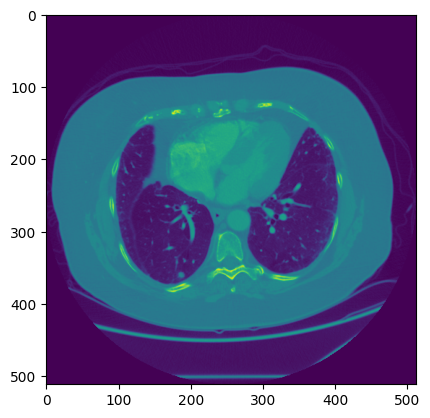

In [15]:
debugger(img_3d[z_i,:,:])

[0. 1.]


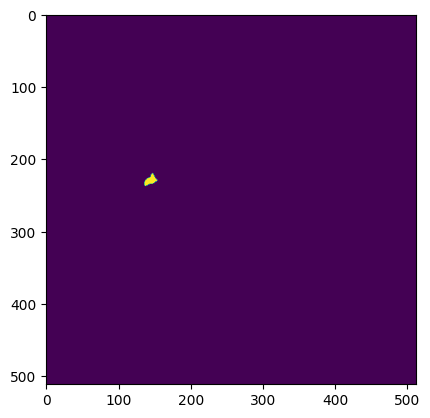

[0. 1.]


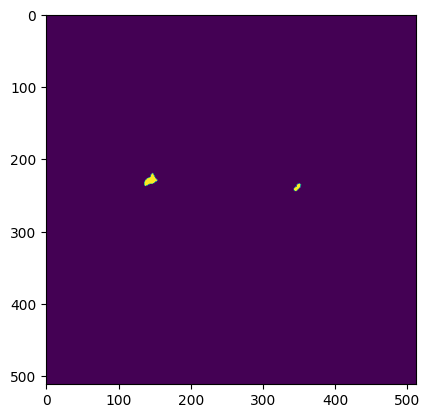

[0. 1.]


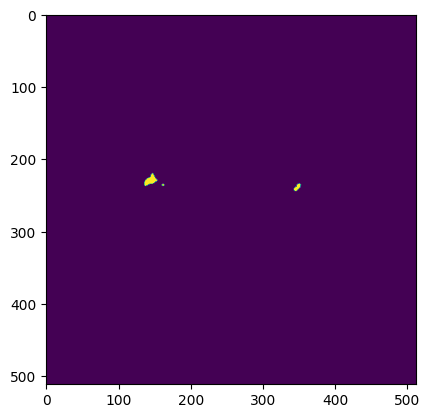

[0. 1.]


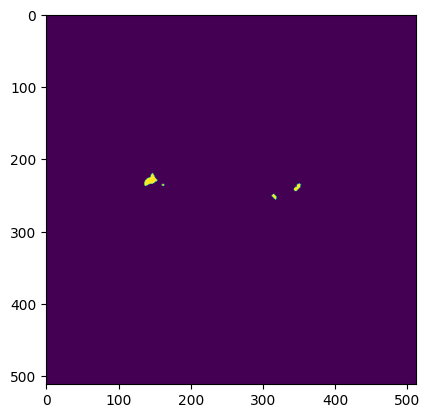

[0. 1.]


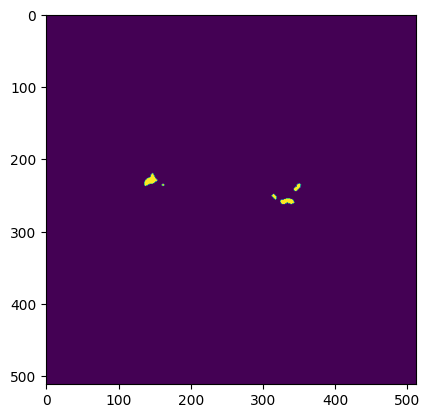

[0. 1.]


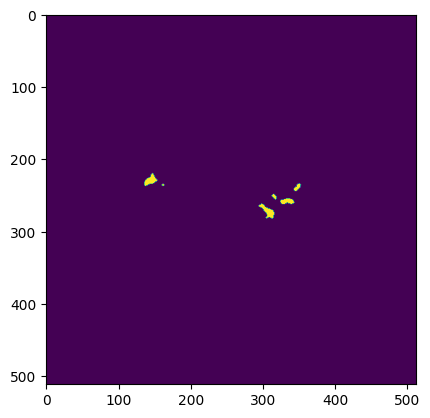

[0. 1.]


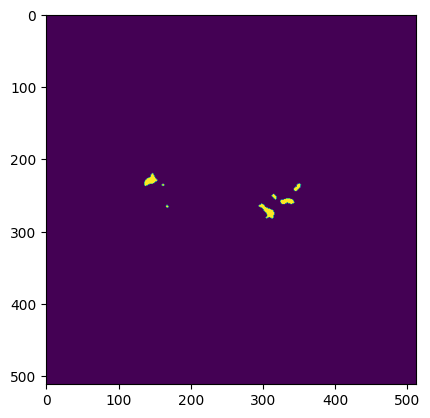

[0. 1.]


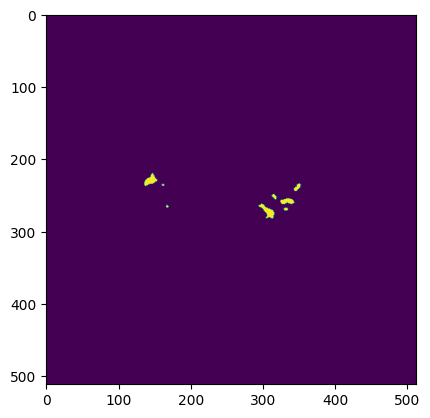

[0. 1.]


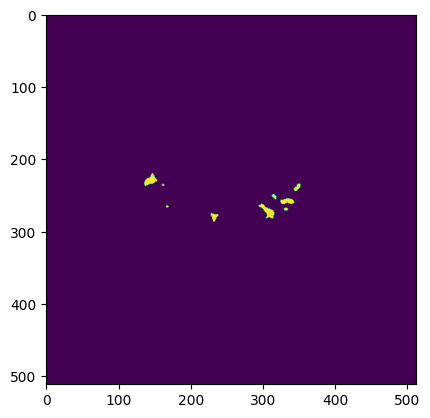

[0. 1.]


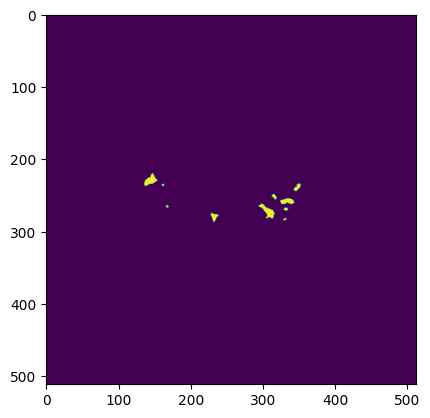

[0. 1.]


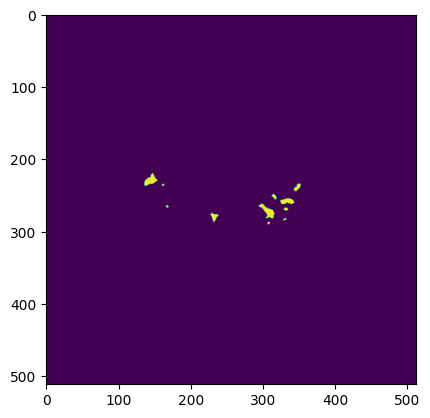

[0. 1.]


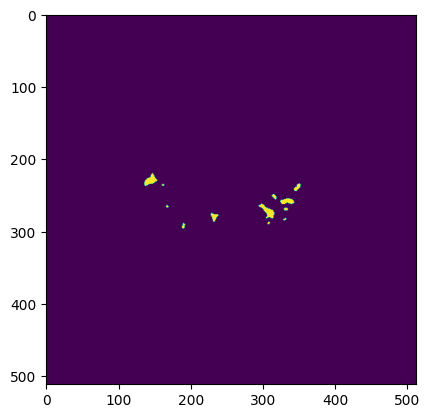

[0. 1.]


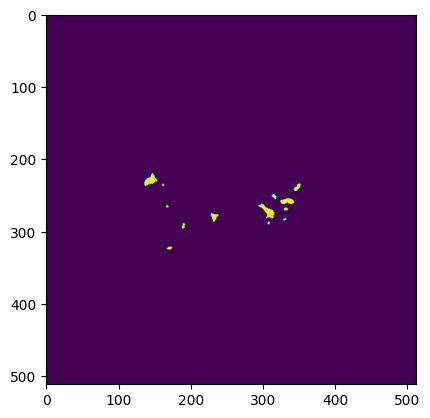

[0. 1.]


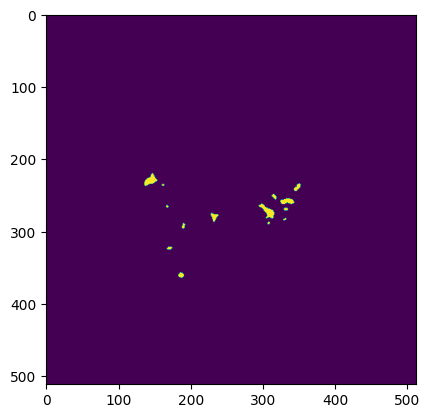

(      x    y   z
 0   144  230  61
 1   347  239  61
 2   162  236  61
 3   316  252  61
 4   333  259  61
 5   306  273  61
 6   167  266  61
 7   332  270  61
 8   232  280  61
 9   330  284  61
 10  308  289  61
 11  190  293  61
 12  170  324  61
 13  187  361  61,
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

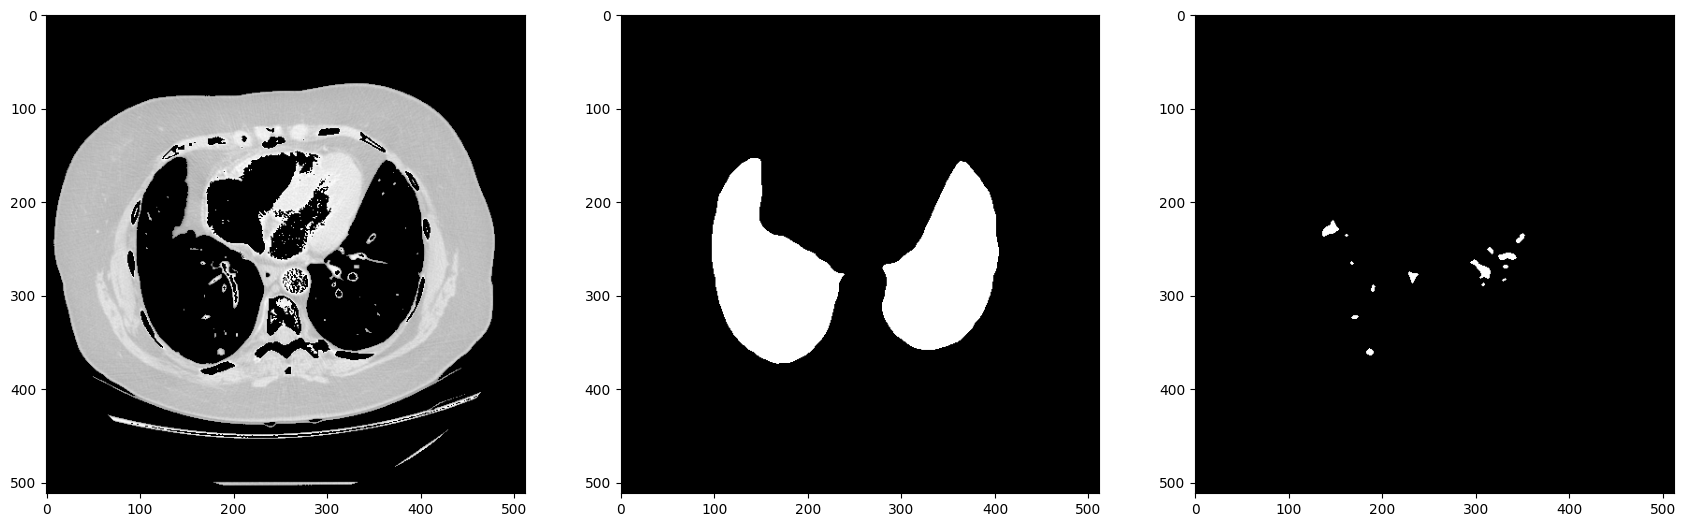

In [17]:
#get_slice_candidates_old(img_3d[z_i,:,:], z_i, debug_res=True)
get_slice_candidates(img_3d[z_i,:,:], z_i, debug_res=True)


In [18]:
def process_slice_candidates(img, verbose=False, debug=False):
    """
    Process each slice of a 3D image to identify candidate regions of interest.

    Parameters:
    img (numpy.ndarray): A 3D image represented as a numpy array.
    verbose (bool): If True, print detailed progress information. Default is False.

    Returns:
    pd.DataFrame: A dataframe containing candidate coordinates (x, y, z).
    list: A list of masks corresponding to the candidate regions in each slice.
    """
    # Initialize an empty DataFrame to store candidate coordinates
    candidates = pd.DataFrame(columns=["x", "y", "z"])
    # Initialize an empty list to store candidate masks for each slice
    candidates_masks = []

    # Iterate over slices along the first axis (z-axis)
    for slice_i in range(img.shape[0]):
        if verbose:
            print(f"[START] - processing slice #{slice_i}")

        # Extract the current slice along the z-axis
        slice_ = img[slice_i, :, :]

        # Apply the function to identify candidates and their masks in the current slice
        slice_candidates, slice_candidates_mask = get_slice_candidates(
            slice_, slice_i, debug_res=debug)

        if verbose:
            print(
                f"[DONE] - {len(slice_candidates)} candidates found for slice #{slice_i}")

        # Append the found candidates to the main candidates DataFrame
        candidates = pd.concat(
            [candidates, slice_candidates], ignore_index=True)

        # Add the mask for the current slice to the candidates_masks list
        candidates_masks.append(slice_candidates_mask)

        if verbose:
            print(f"\n[STATUS] - {len(candidates)} candidates found\n" +
                  f"[STATUS] - {img.shape[0]-slice_i} slices left\n")

    return candidates, candidates_masks


In [19]:
result  = process_slice_candidates(img_3d, True)
result

[START] - processing slice #0
[DONE] - 0 candidates found for slice #0

[STATUS] - 0 candidates found
[STATUS] - 139 slices left

[START] - processing slice #1
[DONE] - 0 candidates found for slice #1

[STATUS] - 0 candidates found
[STATUS] - 138 slices left

[START] - processing slice #2
[DONE] - 0 candidates found for slice #2

[STATUS] - 0 candidates found
[STATUS] - 137 slices left

[START] - processing slice #3
[DONE] - 0 candidates found for slice #3

[STATUS] - 0 candidates found
[STATUS] - 136 slices left

[START] - processing slice #4
[DONE] - 0 candidates found for slice #4

[STATUS] - 0 candidates found
[STATUS] - 135 slices left

[START] - processing slice #5
[DONE] - 0 candidates found for slice #5

[STATUS] - 0 candidates found
[STATUS] - 134 slices left

[START] - processing slice #6
[DONE] - 0 candidates found for slice #6

[STATUS] - 0 candidates found
[STATUS] - 133 slices left

[START] - processing slice #7
[DONE] - 0 candidates found for slice #7

[STATUS] - 0 candi

(        x    y    z
 0     418  255   24
 1     421  236   26
 2     420  234   28
 3     373  324   29
 4     418  208   31
 ...   ...  ...  ...
 1191  177  329  116
 1192  296  310  118
 1193  348  300  119
 1194  176  319  119
 1195  334  306  121
 
 [1196 rows x 3 columns],
 [array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0.,

### Candidates results from z axis

In [20]:
result[0]

x    y    z
0     418  255   24
1     421  236   26
2     420  234   28
3     373  324   29
4     418  208   31
...   ...  ...  ...
1191  177  329  116
1192  296  310  118
1193  348  300  119
1194  176  319  119
1195  334  306  121

[1196 rows x 3 columns]

In [24]:
hit_indexes, hit_indexes_dict = find_neighborhood_indices(result[0], convert_annotation_df(annotations_by_uid(read_in_uid, EXPANDED_ANNOTATIONS_DF)))
print(hit_indexes_dict)
result[0].loc[hit_indexes]

{71: [347, 370, 384]}


x    y   z
347  186  362  59
370  187  361  60
384  187  361  61

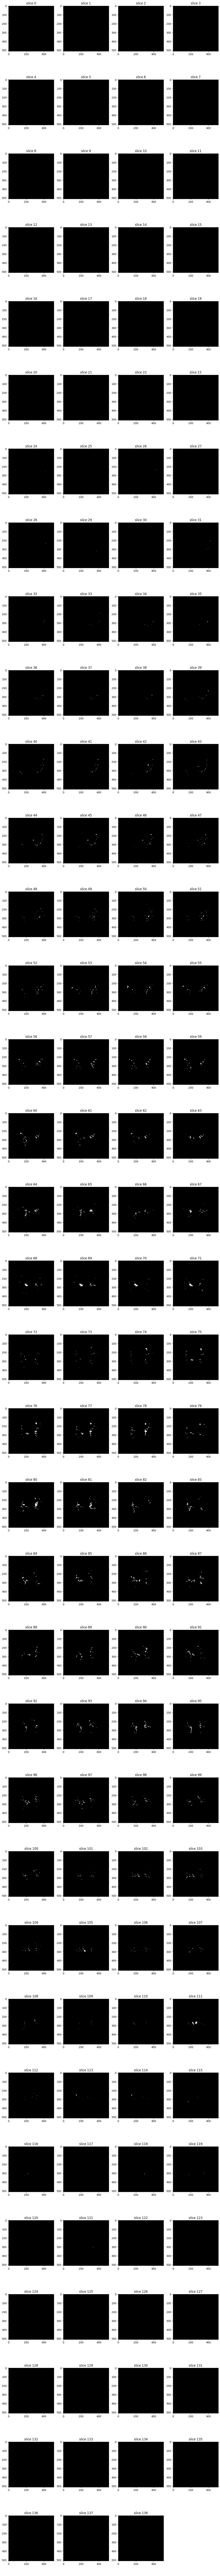

In [25]:
masks = result[1]
plot_slices(masks)

## Reconstruct candidates mask

In [26]:
mask_img_3d = np.array(masks)
mask_img_3d.shape

(139, 512, 512)

### Candidates results from y axis

In [27]:
plot_slices(get_slices(mask_img_3d, axis_index=1))

## Filter out false candidates from y axis

In [28]:
def filter_slice_on_y_axis(y_slice, area_th=(48*48),  debug=False):
  if not len(y_slice.nonzero()[0]):
    if debug:
      print(f"[SKIP] - empty mask at slice ")
      return y_slice.astype(bool)
  if debug:
    plt.imshow(y_slice)
    plt.show()

  # Label connected components in the closed image
  labels = measure.label(y_slice)
  properties = measure.regionprops(labels)

  if debug:
    plt.imshow(labels)
    plt.show()

  # Sort regions by area and keep those larger than a threshold
  detected_objects = [obj for obj in properties if obj.area < area_th and obj.area] # area filtering
  detected_objects = [obj for obj in detected_objects if obj.solidity > 0.65] # solidity filtering

  # Create an empty image to hold the result
  filtered_image = np.zeros_like(y_slice, dtype=bool)

  # Fill in the regions of the relevant objects
  for prop in detected_objects:
      if debug:
        print(f"label: {prop.label}")
        print(f"area: {prop.area}")
        print(f"eccentricity: {prop.eccentricity}")
        print(f"solidity: {prop.solidity}")
      filtered_image[labels == prop.label] = True

  if debug:
    plt.imshow(filtered_image)
    plt.show()

  return filtered_image

In [29]:
y_i = annotations.iloc[0]["y"]
annotations

x    y   z  diam_x  diam_y  diam_z
71  187  361  61      11      11       3

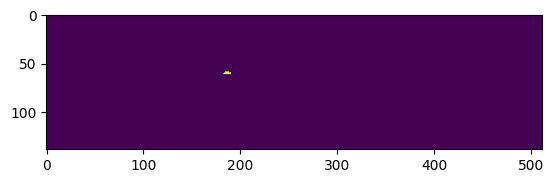

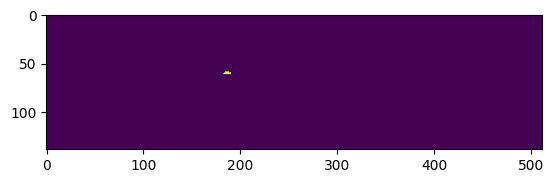

label: 1
area: 19
eccentricity: 0.9238585257650181
solidity: 0.95


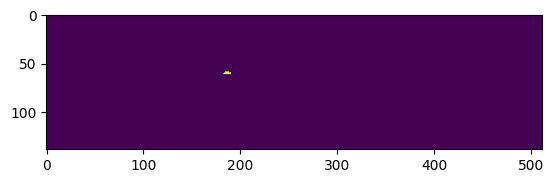

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [30]:
y_slice = mask_img_3d[:, y_i, :]
filter_slice_on_y_axis(y_slice, debug=True)

In [31]:
y_filtered_mask_img_3d = process_slices(mask_img_3d, axis_index=1, func=filter_slice_on_y_axis)

In [32]:
plot_slices(get_slices(y_filtered_mask_img_3d, axis_index=1))

In [33]:
y_filtered_mask_img_3d.shape

(139, 512, 512)

In [34]:
# Identify connected components
labeled_mask = measure.label(y_filtered_mask_img_3d, connectivity=1)

num_features = labeled_mask.max()

# Calculate the centers of mass for each object
centers = center_of_mass(y_filtered_mask_img_3d, labeled_mask, range(1, num_features + 1))
centers = np.array(centers)
centers

array([[ 24.        , 255.        , 418.        ],
       [ 26.        , 236.5       , 421.        ],
       [ 28.        , 233.5       , 420.        ],
       ...,
       [119.        , 300.3       , 348.3       ],
       [119.        , 319.        , 176.5       ],
       [121.        , 306.        , 334.16666667]])

In [35]:
centers_df = pd.DataFrame({
    "x": np.round(centers[:,2]).astype(int),
    "y": np.round(centers[:,1]).astype(int),
    "z": np.round(centers[:,0]).astype(int),
})
centers_df

x    y    z
0    418  255   24
1    421  236   26
2    420  234   28
3    373  324   29
4    418  208   31
..   ...  ...  ...
689  177  329  116
690  296  310  118
691  348  300  119
692  176  319  119
693  334  306  121

[694 rows x 3 columns]

In [36]:
hit_indexes, hit_indexes_dict = find_neighborhood_indices(centers_df, convert_annotation_df(annotations_by_uid(read_in_uid, EXPANDED_ANNOTATIONS_DF)))
hit_indexes_dict
print(f"GT: {annotations}")
print(f"Hits: {centers_df.loc[hit_indexes]}")

GT:       x    y   z  diam_x  diam_y  diam_z
71  187  361  61      11      11       3
Hits:        x    y   z
204  187  361  60


In [37]:
sensitivity_score(centers_df, convert_annotation_df(annotations_by_uid(read_in_uid, EXPANDED_ANNOTATIONS_DF)))

1.0

In [38]:
# raise Exception("STOP IT")

Exception: STOP IT

In [39]:
def process_slice_candidates_2_axes(img_3d, verbose=False, debug=False):
  # Candidate extraction from Z axis
  z_centers_df, masks = process_slice_candidates(img_3d, )

  # Reconstruction of 3d mask
  mask_img_3d = np.array(masks)

  # Filtering out false candidates on Y axis
  y_filtered_mask_img_3d = process_slices(mask_img_3d, axis_index=1, func=filter_slice_on_y_axis)

  # Identify connected components in 3D mask
  labeled_mask = measure.label(y_filtered_mask_img_3d, connectivity=1)

  num_features = labeled_mask.max()

  # Calculate the centers of mass for each object
  centers = center_of_mass(y_filtered_mask_img_3d, labeled_mask, range(1, num_features + 1))
  centers = np.array(centers)

  y_centers_df = pd.DataFrame({
      "x": np.round(centers[:,2]).astype(int),
      "y": np.round(centers[:,1]).astype(int),
      "z": np.round(centers[:,0]).astype(int),
  })
  return y_centers_df, z_centers_df



In [ ]:
scores_ = {}
hits_ = {}

save_path = "/content/drive/Shareddrives/IA DL_project/ML IA/LUNA16/candidates/solidity_on_z/subset0"

for i, uid, in enumerate(image_dict[read_in_subset].keys()):
  print(f"Case {i+1} out of {len(image_dict[read_in_subset].keys())}")

  img_3d = img_by_uid(uid, image_dict)
  print(f"[START] - {uid}")
  centers_y_df, centers_z_df = process_slice_candidates_2_axes(img_3d)

  centers_z_df.to_csv(os.path.join(save_path, "z", f"{uid}.csv"))
  centers_y_df.to_csv(os.path.join(save_path, "y", f"{uid}.csv"))

  print(f"[Z-axis] - Count: {len(centers_z_df)} ")
  tp_z_i , tp_z_dict = find_neighborhood_indices(centers_z_df, convert_annotation_df(annotations_by_uid(uid, EXPANDED_ANNOTATIONS_DF)))
  print(f"[TRUE POSITIVE, Z] - ")
  print(tp_z_dict)

  print(f"[Y-axis] - Count: {len(centers_y_df)}")
  tp_y_i , tp_y_dict = find_neighborhood_indices(centers_y_df, convert_annotation_df(annotations_by_uid(uid, EXPANDED_ANNOTATIONS_DF)))
  print(f"[TRUE POSITIVE, Y] - ")
  print(tp_y_dict)

  sensitivity  = sensitivity_score(centers_y_df, convert_annotation_df(annotations_by_uid(uid, EXPANDED_ANNOTATIONS_DF)))
  print(f"[SENSITIVITY] - {sensitivity}")
  print(f"[DONE] - {uid}\n")
  scores_[uid] = sensitivity
  hits_[uid] = {"z": tp_z_dict, "y": tp_y_dict}



Case 1 out of 67
[START] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492
[Z-axis] - Count: 1384 
[TRUE POSITIVE, Z] - 
{0: [143, 157]}
[Y-axis] - Count: 771
[TRUE POSITIVE, Y] - 
{0: [86]}
[SENSITIVITY] - 1.0
[DONE] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.108197895896446896160048741492

Case 2 out of 67
[START] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524522225658609808059
[Z-axis] - Count: 2827 
[TRUE POSITIVE, Z] - 
{1: [1060, 1118, 1123, 1145, 1150, 1177, 1182, 1206, 1235, 1262, 1285, 1293, 1312, 1313, 1360, 1361, 1362, 1388, 1389, 1392, 1417, 1420, 1422, 1444, 1465, 1466, 1489, 1490], 2: [863, 864, 898, 931]}
[Y-axis] - Count: 1398
[TRUE POSITIVE, Y] - 
{1: [597, 640, 734, 757, 758, 759, 760, 769, 770, 773, 785, 786, 802], 2: [487, 489]}
[SENSITIVITY] - 1.0
[DONE] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524522225658609808059

Case 3 out of 67
[START] - 1.3.6.1.4.1.14519.5.2.1.6279.6001.111172165674661221381920536987
[Z-axis] - Count: 5135 
[TRUE POSITIVE, Z]

In [ ]:
scores_
av_score = 0

for i in scores_.values():
  av_score += i

av_score/len(scores_.values())

In [ ]:
sen_z = 0
sen_y = 0
count = 0

for i in hits_.values():
  for z in (i["z"].values()):
    count +=1
    if len(z):
      sen_z += 1
  for y in (i["y"].values()):
    if len(y):
      sen_y += 1

print(f"sensitivity z: {sen_z/count}")
print(f"sensitivity y: {sen_y/count}")

